<a href="https://colab.research.google.com/github/TrunnMosby/Predictive-Maintenance-of-Wind-Turbine/blob/main/Wind_turbine_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing dataset
data=pd.read_csv('/content/hypothesis_3.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Mahanabolis distance filteration
MD=pd.read_csv('/content/MD_newdata.csv')

In [5]:
# Merging both datasets
df= pd.merge(data,MD)

In [6]:
# Removing the null values
df=df.dropna()

In [7]:
df=df.drop('Date',axis=1)

In [8]:
df

,Unnamed: 0,Gen_Phase1_Temp_Avg,Amb_WindSpeed_Est_Avg,Prod_CurPhse1_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,Grd_Prod_Pwr_Avg,Grd_Prod_PsblePwr_Avg,Prod_LatestAvg_ActPwrGen1,ID,MD
0,1,54,3.1,10.0,3.1,-1390.0,-8.4,0.6,0.0,T01,2.799417
1,2,53,3.4,11.0,3.4,-1619.0,-9.7,1.6,0.0,T06,3.030315
2,3,63,3.7,90.1,3.5,4862.0,29.2,29.2,4862.0,T07,3.707309
3,4,51,3.3,10.0,3.3,-1365.0,-8.2,2.2,0.0,T01,2.459624
4,5,57,3.3,89.1,3.2,4702.0,27.7,32.4,5430.0,T11,3.522508
...,...,...,...,...,...,...,...,...,...,...,...
209230,209231,89,8.7,969.1,9.0,192110.0,1153.3,1155.1,192110.0,T01,4.709864
209231,209232,45,1.3,11.7,1.3,-1842.0,-11.0,0.0,0.0,T06,1.306276
209232,209233,72,7.9,737.5,8.0,143336.0,861.1,859.7,143336.0,T11,6.503370
209233,209234,41,2.6,11.6,2.6,-1828.0,-11.0,2.0,0.0,T06,1.883051


In [9]:
df=df[df['Prod_LatestAvg_TotActPwr']!=0]

In [10]:
# Filtering outliers
max_threshold=df['MD'].quantile(0.85)
min_threshold=df['MD'].quantile(0.15)

In [11]:
ftest=df[(df['MD']<max_threshold) & (df['MD']>min_threshold)]

In [12]:
ftest

,Unnamed: 0,Gen_Phase1_Temp_Avg,Amb_WindSpeed_Est_Avg,Prod_CurPhse1_Avg,Amb_WindSpeed_Avg,Prod_LatestAvg_TotActPwr,Grd_Prod_Pwr_Avg,Grd_Prod_PsblePwr_Avg,Prod_LatestAvg_ActPwrGen1,ID,MD
0,1,54,3.1,10.0,3.1,-1390.0,-8.4,0.6,0.0,T01,2.799417
1,2,53,3.4,11.0,3.4,-1619.0,-9.7,1.6,0.0,T06,3.030315
2,3,63,3.7,90.1,3.5,4862.0,29.2,29.2,4862.0,T07,3.707309
3,4,51,3.3,10.0,3.3,-1365.0,-8.2,2.2,0.0,T01,2.459624
4,5,57,3.3,89.1,3.2,4702.0,27.7,32.4,5430.0,T11,3.522508
...,...,...,...,...,...,...,...,...,...,...,...
209228,209229,96,9.4,1162.2,9.8,231292.0,1388.9,1391.8,231292.0,T07,3.213454
209229,209230,41,1.0,11.8,1.0,-1734.0,-10.5,0.0,0.0,T01,3.425543
209230,209231,89,8.7,969.1,9.0,192110.0,1153.3,1155.1,192110.0,T01,4.709864
209232,209233,72,7.9,737.5,8.0,143336.0,861.1,859.7,143336.0,T11,6.503370


In [13]:
# Selecting input and output for training the model
features=ftest[['Gen_Phase1_Temp_Avg','Amb_WindSpeed_Est_Avg','Prod_CurPhse1_Avg','Amb_WindSpeed_Avg','Grd_Prod_Pwr_Avg',	'Grd_Prod_PsblePwr_Avg',	'Prod_LatestAvg_ActPwrGen1']]
labels=ftest['Prod_LatestAvg_TotActPwr']

In [14]:
len(features),len(labels)

(146460, 146460)

In [15]:
P=[]
for i in ftest['Amb_WindSpeed_Est_Avg']:
  P.append((0.5*1.23*7854*0.59*i*i*i))

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [17]:
print(np.sqrt(mae(ftest['Prod_LatestAvg_TotActPwr'],P)/1000))

35.271535420021394


<Figure size 1440x1440 with 0 Axes>

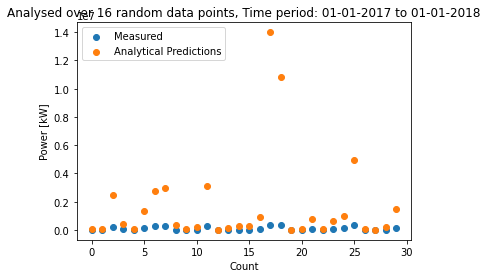

<Figure size 1440x1440 with 0 Axes>

In [18]:
plt.scatter([i for i in range(len(ftest.iloc[::5000]))],ftest['Prod_LatestAvg_TotActPwr'].iloc[::5000])
plt.scatter([i for i in range(len(ftest.iloc[::5000]))],P[::5000])


plt.legend(['Measured','Analytical Predictions'])
plt.ylabel('Power [kW]')
plt.xlabel('Count')
plt.title('Analysed over 16 random data points, '+'Time period: 01-01-2017 to 01-01-2018')
plt.figure(figsize=(20, 20))

In [19]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(features)

In [20]:
len(x_sc)

146460

In [21]:
# Spliting the data into 70% train and 30% test
xtrain=x_sc[:102505]
xtest=x_sc[102505:]
ytrain=labels[:102505]
ytest=labels[102505:]

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=6)
poly_variables = poly.fit_transform(features)

In [23]:
regression = linear_model.LinearRegression()
regression.fit(xtrain,ytrain)
regression_pred=regression.predict(xtest)

In [24]:
test_deviation_poly=[]
for i,j in zip(regression_pred,ytest):
  test_deviation_poly.append(j-i)

In [25]:
updated_poly=[]
for i in test_deviation_poly:
  updated_poly.append(i/1000)

In [26]:
ucl_non=4*np.std(updated_poly)
lcl_non=-1*ucl_non

In [27]:
LCL_non=[]
for i in range(len(ytest)):
  LCL_non.append(lcl_non)
UCL_non=[]
for i in range(len(ytest)):
  UCL_non.append(ucl_non)

Text(0.5, 1.0, 'Predictions using Non-linear model   (On x-axis:1440units= 10 days)')

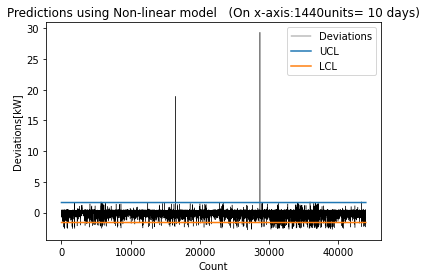

In [28]:
# training the Non-linear model
plt.plot(updated_poly,color='black',linewidth=0.4)
plt.plot(UCL_non)
plt.plot(LCL_non)
plt.ylabel('Deviations[kW]')
plt.xlabel('Count')
plt.legend(['Deviations','UCL','LCL'])
plt.xticks(np.arange(0, len(updated_poly)+1, 10000))
plt.title('Predictions using Non-linear model  '+' (On x-axis:1440units= 10 days)')

In [29]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(regression_pred,ytest))/1000)

0.40668558123655235


In [30]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(ytest,regression_pred))

246.12509735369633


In [31]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [32]:
# training the random forest model
gmodel=RandomForestRegressor()
gmodel.fit(xtrain,ytrain)
pred=gmodel.predict(xtest)
train_pred= gmodel.predict(xtrain)

In [61]:
print(np.sqrt(mse(pred,ytest))/1000)

0.19048263034045318


In [62]:
pred_scaled=[]
for i in pred:
  pred_scaled.append(i/1000)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR

In [64]:
# training the K Neighbors model
kmodel=KNeighborsRegressor()
kmodel.fit(xtrain,ytrain)
pred_kmodel=kmodel.predict(xtest)

In [65]:
# training the SVR model
svmodel=SVR()
svmodel.fit(xtrain,ytrain)
pred_svmodel=svmodel.predict(xtest)

In [66]:
pred_kmodel_scaled=[]
for i in pred_kmodel:
  pred_kmodel_scaled.append(i/1000)

In [60]:
print((mae(pred_kmodel,ytest))/1000)

0.4626715003981344


In [61]:
pred_svmodel_scaled=[]
for i in pred_svmodel:
  pred_svmodel_scaled.append(i/1000)

In [62]:
print((mae(pred_svmodel,ytest))/1000)

64.30918282105395


In [63]:
regression_pred_scaled=[]
for i in regression_pred:
  regression_pred_scaled.append(i/1000)

In [64]:
ytest_scaled=[]
for i in ytest:
  ytest_scaled.append(i/1000)

<Figure size 1440x1440 with 0 Axes>

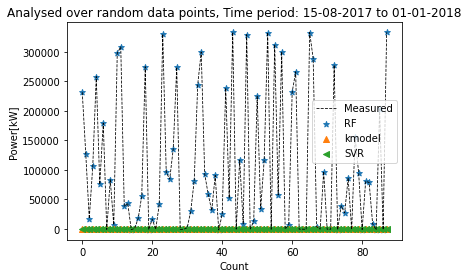

<Figure size 1440x1440 with 0 Axes>

In [65]:
plt.plot([i for i in range(len(pred[::500]))],ytest[::500],linestyle='dashed',color='black',linewidth=0.8)
#plt.scatter([i for i in range(len(pred[::500]))],ytest[::500],marker='<')
plt.scatter([i for i in range(len(pred[::500]))],pred[::500],marker='*')
plt.scatter([i for i in range(len(pred[::500]))],pred_kmodel_scaled[::500],marker='^')
plt.scatter([i for i in range(len(pred[::500]))],pred_svmodel_scaled[::500],marker='<')
#plt.scatter([i for i in range(len(pred[::500]))],regression_pred_scaled[::500],marker='>')

plt.legend(['Measured','RF','kmodel','SVR'])
plt.ylabel('Power[kW]')
plt.xlabel('Count')
plt.title('Analysed over random data points, '+'Time period: 15-08-2017 to 01-01-2018')
plt.figure(figsize=(20, 20))

In [33]:
deviation=[]
for i,j in zip(pred,ytest):
  deviation.append(j-i)

In [34]:
f=pd.DataFrame({'Deviations':deviation})

In [35]:
f['Deviations_shift']=f['Deviations'].shift(1)

In [36]:
f['difference']=f['Deviations'].diff()

In [37]:
count= [i for i in range(len(ytest))]

In [38]:
f=f.dropna()

In [39]:
values=[]
for i in f['difference']:
  if(i>0):
    values.append(i)
  else:
    values.append(-1*i)

In [40]:
d=[]
for i in f['Deviations']:
  d.append(i/1000)

In [57]:
ucl=4* np.std(d)
lcl=-1*ucl


In [58]:
UCL=[]
for i in range(23000):
  UCL.append(ucl)

In [59]:
LCL=[]
for i in range(23000):
  LCL.append(lcl)

Text(0.5, 1.0, 'Predictions using RF for Generator failure (On x-axis:1440 units= 10 days)  Time period: 15-08-2017 to 01-01-2018')

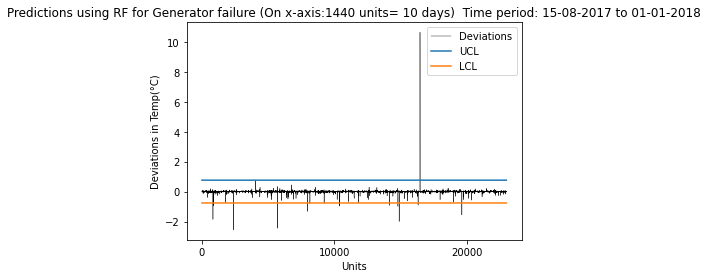

In [60]:
plt.plot(d[:23000],color="black",linewidth=0.4)
#plt.scatter([i for i in range(len(zero))], zero) 
plt.plot(UCL)
plt.plot(LCL)
plt.xticks(np.arange(0, len(d[:23000])+1, 10000))
plt.ylabel('Deviations in Temp(°C)')
plt.xlabel('Units')
plt.legend(['Deviations','UCL','LCL'])
plt.title('Predictions using RF for Generator failure '+ '(On x-axis:1440 units= 10 days)  '+'Time period: 15-08-2017 to 01-01-2018' )